In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [91]:
nyc_data = pd.read_csv('../data/nyc_data_cleaned.csv')
nyc_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.010635,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.420535,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,5.017280,3,0,2011-03-28,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.499810,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,4.394449,10,9,2018-11-19,0.10,1,0


In [92]:
nyc_data["neighbourhood"]= nyc_data["neighbourhood"].astype('category')
nyc_data["neighbourhood"] = nyc_data["neighbourhood"].cat.codes
nyc_data["neighbourhood_group"]= nyc_data["neighbourhood_group"].astype('category')
nyc_data["neighbourhood_group"] = nyc_data["neighbourhood_group"].cat.codes
nyc_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,Private room,5.010635,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,Entire home/apt,5.420535,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,Private room,5.017280,3,0,2011-03-28,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,Entire home/apt,4.499810,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,Entire home/apt,4.394449,10,9,2018-11-19,0.10,1,0


Manually delete the columns name and host_name as it is not a good idea to use user's personal information.

In [93]:
nyc_data_manual = nyc_data.drop(columns = ['name', 'host_name'], axis=1)

In [94]:
nyc_data_manual.dtypes

host_id                             int64
neighbourhood_group                  int8
neighbourhood                       int16
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [95]:
nyc_data_manual.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [96]:
nyc_data_manual["room_type"]= nyc_data_manual["room_type"].astype('category')
nyc_data_manual["room_type"] = nyc_data_manual["room_type"].cat.codes
nyc_data_manual.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,5.010635,1,9,2018-10-19,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,5.420535,1,45,2019-05-21,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,5.017280,3,0,2011-03-28,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,4.499810,1,270,2019-07-05,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,4.394449,10,9,2018-11-19,0.10,1,0


Deleting latitude and longitude as they have negative values


In [97]:
nyc_data_manual = nyc_data_manual.drop(columns = ['latitude', 'longitude'], axis=1)

In [98]:
nyc_data_manual.dtypes

host_id                             int64
neighbourhood_group                  int8
neighbourhood                       int16
room_type                            int8
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Eliminating object type columns for our analysis

In [99]:
nyc_mData =  nyc_data_manual.select_dtypes(exclude=['object'])
print(nyc_mData.dtypes)
nyc_mData.shape

host_id                             int64
neighbourhood_group                  int8
neighbourhood                       int16
room_type                            int8
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


(48895, 10)

In [100]:
nyc_data_copy = nyc_mData.copy()
nyc_xData = nyc_data_copy.drop('price',axis=1)

Dividing to X and Y 

In [101]:
X = nyc_xData
y = nyc_mData["price"]
y = y.astype(int)
print(X.shape)
y.shape

(48895, 9)


(48895,)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

x_train = preprocessing.MinMaxScaler().fit_transform(x_train)
x_test = preprocessing.MinMaxScaler().fit_transform(x_test)

Finding feature importance

In [103]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [104]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

              0         1         2         3         4         5         6  \
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
mean   0.184177  0.045887  0.118638  0.145476  0.111872  0.111626  0.123484   
std    0.008735  0.001335  0.001213  0.001421  0.002068  0.001895  0.001261   
min    0.170084  0.044410  0.116964  0.143107  0.110315  0.108741  0.122073   
25%    0.184122  0.045173  0.118226  0.145382  0.110677  0.111509  0.122613   
50%    0.185511  0.045403  0.118440  0.145867  0.111301  0.111673  0.123660   
75%    0.187216  0.046662  0.119418  0.146225  0.111611  0.112191  0.123711   
max    0.193953  0.047785  0.120143  0.146796  0.115459  0.114016  0.125363   

              7         8  
count  5.000000  5.000000  
mean   0.064472  0.094368  
std    0.003807  0.004285  
min    0.058170  0.088588  
25%    0.064339  0.093639  
50%    0.065126  0.093740  
75%    0.066615  0.095327  
max    0.068108  0.100547  
0    0.184177
1    0.045887
2    0.1

<AxesSubplot:>

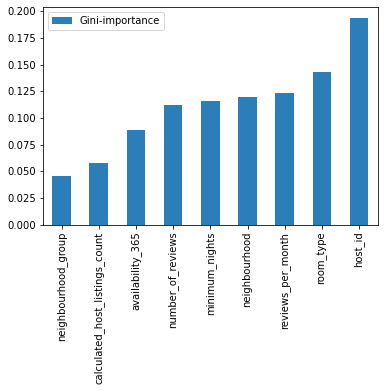

In [105]:
%matplotlib inline
fi = []
for trainIndex, testIndex in skf.split(x_train, y_train):
    
    xTrain, xTest = X.iloc[trainIndex], X.iloc[testIndex]
    yTrain, yTest = y.iloc[trainIndex], y.iloc[testIndex]
    
    
    # fit an Extra Trees model to the data
    model = ExtraTreesClassifier()
    model.fit(xTrain, yTrain)
    
    fi.append(model.feature_importances_)
    
    sfm = SelectFromModel(model, threshold=0.15)
    sfm.fit(xTrain, yTrain)
    xTrain = sfm.transform(xTrain)
    xTest = sfm.transform(xTest)
        
    clf = LogisticRegression(solver="liblinear", multi_class="auto")
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)


# display the relative importance of each attribute
print(pd.DataFrame(fi).describe())
print(pd.DataFrame(fi).mean(axis = 0))



feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(nyc_xData.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',alpha=0.95, rot=90)


In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [107]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(nyc_xData.columns)

In [108]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                            Specs         Score
0                         host_id  4.427848e+10
7  calculated_host_listings_count  1.788451e+05
8                availability_365  1.016135e+05
2                   neighbourhood  4.093165e+04
5               number_of_reviews  2.945984e+04
3                       room_type  1.005998e+04
4                  minimum_nights  8.080855e+03
6               reviews_per_month  6.195369e+02
1             neighbourhood_group  9.219293e+01


In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
x_train = preprocessing.MinMaxScaler().fit_transform(x_train)
x_test = preprocessing.MinMaxScaler().fit_transform(x_test)

In [110]:
## Lasso Feature Selection
### Model Lasso regression
lasso_model = SelectFromModel(LogisticRegression(C=1, penalty='none',max_iter=10000))
lasso_model.fit(x_train, y_train)
lasso_model.get_support()

array([False, False, False, False,  True,  True,  True,  True, False])

In [111]:
feature_importances = pd.DataFrame(lasso_model.get_support(),index = X.columns,columns=['importance']).sort_values('importance',ascending=False)

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(feature_importances)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(lasso_model.estimator_.coef_ == 0)))

total features: 9
selected features: 9
features with coefficients shrank to zero: 0


training set: 0.3404857702880406
validation set: 0.329608703761367
[ True  True  True  True  True  True  True  True  True]
total number of parameters: 9


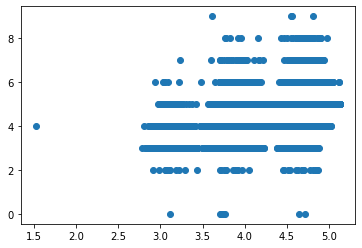

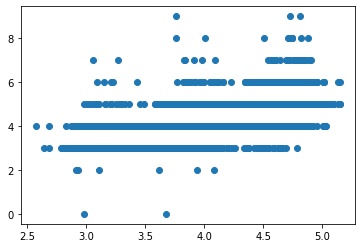

0.3404857702880406
0.3402665056727714


In [112]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

model_lasso = LassoCV(n_alphas=10, max_iter=1e5).fit(x_train, y_train)
model_lasso = model_lasso.fit(x_train, y_train)
print('training set:', model_lasso.score(x_train, y_train))
y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_val_lasso = model_lasso.predict(x_test)
print('validation set:', model_lasso.score(x_test, y_test))
coefs = np.array(model_lasso.coef_!=0)
np.save('selected_coefs.txt', coefs)
print(coefs)
print('total number of parameters:', sum(model_lasso.coef_!=0))
#plt.figure(1)
plt.scatter(y_pred_train_lasso, y_train)
#plt.figure(2)
plt.show()
plt.scatter(y_pred_val_lasso, y_test)
plt.show()
a = r2_score(y_train,y_pred_train_lasso)
n =len(x_train)
print(a)
r2_adj = 1- (1-a)*(n-1)/(n-(13+1))
print(r2_adj)

In [113]:
from sklearn import feature_selection

linear_reg = SelectKBest(score_func=feature_selection.f_regression,k=4)

fit_linear = linear_reg.fit(x_train,y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                            Specs         Score
0                         host_id  4.427848e+10
7  calculated_host_listings_count  1.788451e+05
8                availability_365  1.016135e+05
2                   neighbourhood  4.093165e+04
5               number_of_reviews  2.945984e+04
3                       room_type  1.005998e+04
4                  minimum_nights  8.080855e+03
6               reviews_per_month  6.195369e+02
1             neighbourhood_group  9.219293e+01


In [114]:
nyc_mData.dtypes
nyc_mData.shape

(48895, 10)

In [115]:
X = nyc_xData
y = nyc_mData["price"]
nyc_xData = nyc_xData.drop('neighbourhood_group', axis=1)
nyc_xData['price'] = nyc_mData['price']
print(nyc_xData.dtypes)
nyc_xData.to_csv("../data/nyc_featureselected.csv",index = False)

host_id                             int64
neighbourhood                       int16
room_type                            int8
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                             float64
dtype: object


In [116]:
nyc_mData.dtypes

host_id                             int64
neighbourhood_group                  int8
neighbourhood                       int16
room_type                            int8
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [117]:
nyc_mData.to_csv("../data/nyc_without_featureselection.csv",index = False)